<small><i>This notebook was put together by [Jake Vanderplas](http://www.vanderplas.com) for PyCon 2015. Source and license info is on [GitHub](https://github.com/jakevdp/sklearn_pycon2015/).</i></small>

# 机器学习的基本方法

这里我们将深入机器学习的方法，和怎么通过sklearn API去利用它们。

在简单的介绍sklearn的*Estimator*对象后，我们会介绍**监督学习**，包括**分类**和**回归**问题，接下来**无监督学习**，包括**降维**和**聚类**问题。

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()

# eliminate warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Sklearn  estimator对象

Sklearn中的每一个算法都被某一个''Estimator''对象所表示。例如一个线性回归被表示为：

In [3]:
from sklearn.linear_model import LinearRegression

**Estimator参数**：所有的estimator参数可以在初始化时被赋值，否则会用本身的默认值。

In [4]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [5]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


**估计模型的参数**：当数据已经拟合了estimator，模型参数就能很方便的估计出来。所有的参数都是estimator对象的属性，它们以下划线结尾。

In [6]:
x = np.arange(10)
y = 2 * x + 1

In [7]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


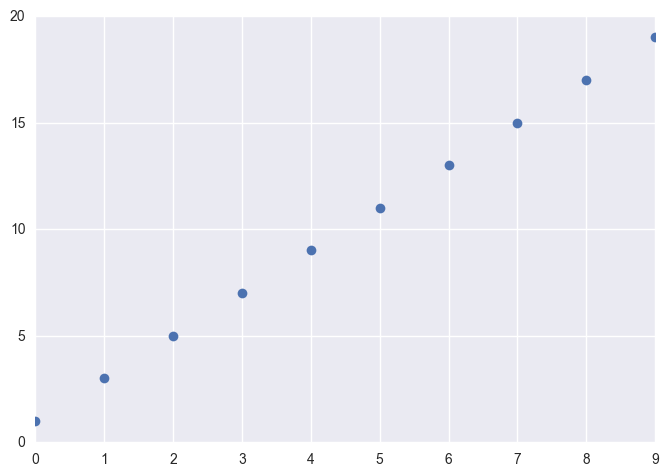

In [8]:
plt.plot(x, y, 'o');

In [9]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [10]:
# fit the model on our data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [11]:
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[ 2.]
1.0


我们可以看到一条我们期望的斜率为2，截距为1的直线。

## 监督学习：分类和回归

在**监督学习**中，我们拿到包含特征和标签的数据集。接下来的任务就是构造一个estimator能够根据特征来预测样本的标签。之前我们举了个简单的鸢尾花分类的例子。下面我们来看一些复杂的例子：

- 给定一张通过天文望远镜拍摄的多色图，判断一个物体是恒星，还是类星体，或者是星系。
- 给定一张人物的照片，来识别照片中的人是谁。
- 给定人们看过的电影列表和相关评分，给他们推荐他们可能想看的电影

上面的这些例子有一个或者多个的未知量，需要已知量中推测出来。

监督学习进一步分为**分类**和**回归**这两类。
在**分类**中，标签是离散的；而在**回归**中标签是连续的。例如，在天文学中，判断一个物体是否是恒星，还是类星体，或者是星系就是分类问题，因为这三类标签是离散的。另一方面，我们想通过一些观测量来判断一个物体的年龄，它就是个回归问题，因为年龄标签是连续的。

### 分类例子
K最近邻接（kNN）是一种最简单的学习策略：给定一个新的，没见过的观测样本，在特征空间中找到的k个最相邻的样本，这些样本中的大多数属于某一个类别，则新样本也属于这个类别。

让我们用iris（鸢尾花）的例子做个测试：

In [12]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])
print(iris.target_names[result])

['versicolor']


You can also do probabilistic predictions:

In [13]:
knn.predict_proba([[3, 5, 4, 2],])

array([[ 0. ,  0.8,  0.2]])

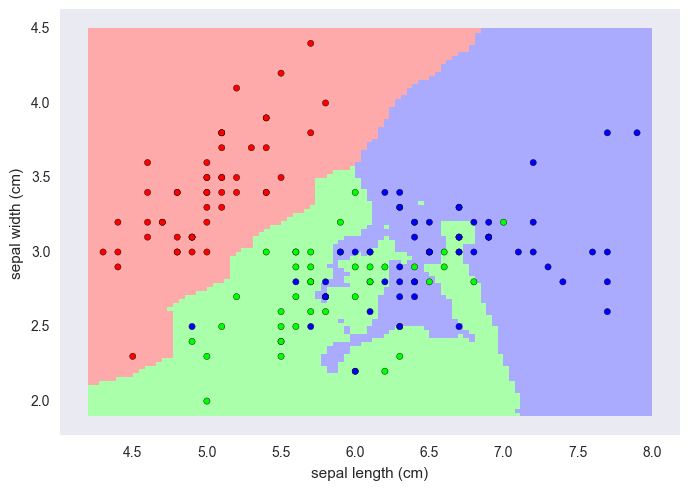

In [14]:
from fig_code import plot_iris_knn
plot_iris_knn()

---

#### 练习
使用``sklearn.svm.SVC``解决上面的问题。

In [15]:
from sklearn.svm import SVC

# load the data
iris = datasets.load_iris()
X, y = iris.data, iris.target

C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = svc.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


---

### 回归例子

一个最简单的回归例子就是用直线来拟合数据，就像我们之前看到的那样。
sklearn也提供了很多很有用的回归算法。

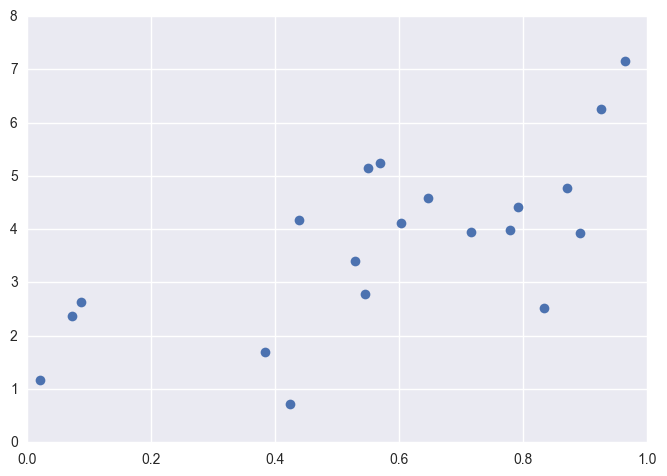

In [16]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

上面的图我们可以用一条直线来拟合：

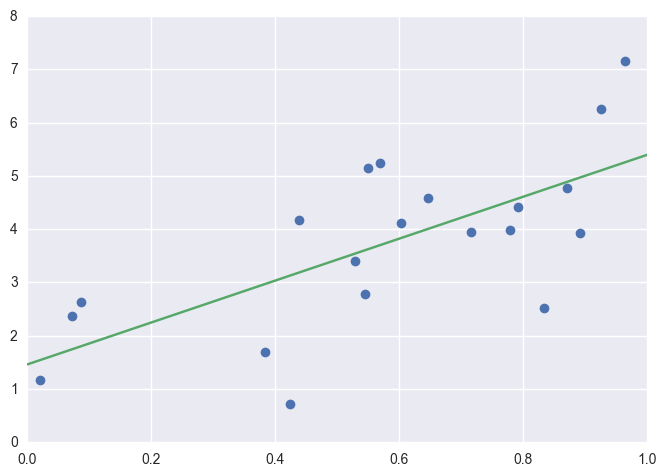

In [17]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

sklearn也有很多的模型，它们能更好的表示数据集中的特征：

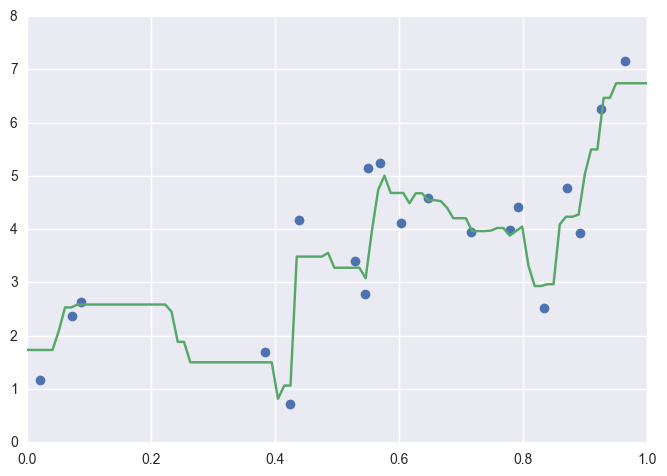

In [18]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

上面这个模型貌似“更好”的拟合了数据，后面我们将讨论如何选择一个模型的细节。

---
#### 练习

探索``RandomForestRegressor``对象，它里面有哪些参数？如果改变了这些参数上面的图会发生怎样的变化？

---

## 无监督学习：降维和聚类
**无监督学习**致力于解决不同分类的问题。这类数据没有标签，我们对他们之间的相似性很感兴趣。在某种意义上，你能认为无监督学习是数据自身发现标签的过程。无监督学习有**降维**，**聚类**和**密度估计**这三部分组成。下面是一些无监督学习的问题：

- 给定遥远星系的详细观察数据，决定哪一种特征或者特征混合集能最好地对这类数据进行总结。
- 给定两种声音源的混合（例如，一种人声和背景音乐），然后把它们分离开来。
- 给定一段视频，提取出移动的物体，把它和之前见过的移动物体进行分类。

有时无监督和监督这两种方法可以结合起来：例如，无监督用来在各式各样的数据中发现有用的特征，然后把这些特征应用到一种监督学习框架中。

### 降维：PCA

主成分分析（PCA）是一种降维技术，它能发现特征之间的差异然后对特征进行混合而达到降维的目的。

看下iris数据集。因为有四种特征，所以不能用2D plot来可视化。但可以通过对花瓣和花萼的宽高特征进行混合来展示。

('Reduced dataset shape:', (150, 2))
(150, 2)
[-2.68420713  0.32660731]
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.176 x petal length (cm) + -0.075 x petal width (cm)


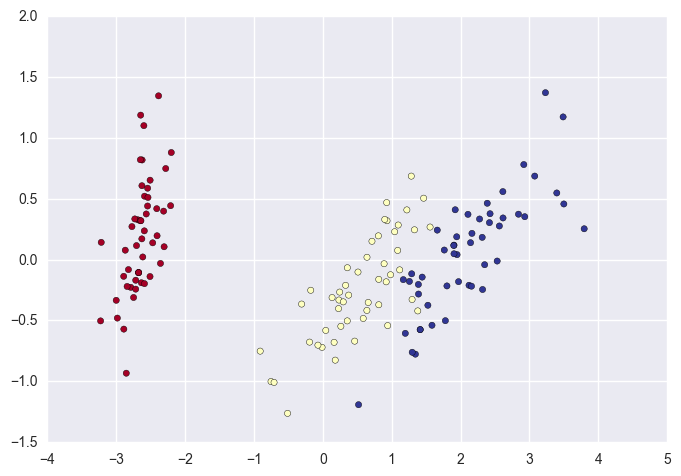

In [19]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

print(X_reduced.shape)
print(X_reduced[0])
import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

for component in pca.components_:  
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

#### 聚类: K-means

聚类使用一个给定的标准把具有相同性质的样本进行分组

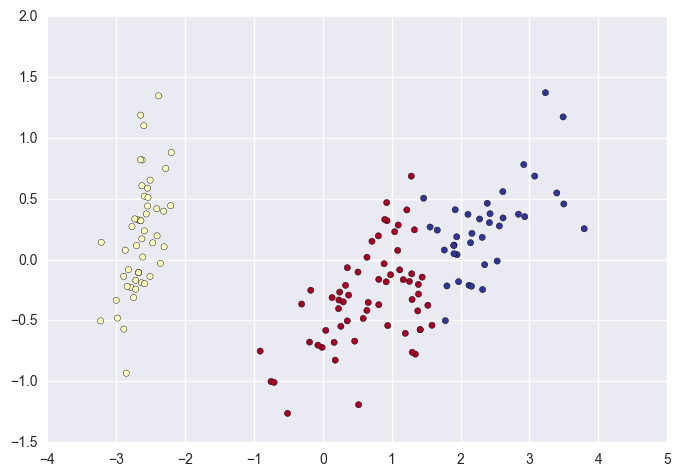

In [20]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

### 总结：sklearn estimator接口

sklearn确保在所有的方法中使用统一的接口，下面我们看一些这样的例子。给定sklearn **estimator**对象叫做`model`，有下面的方法：

- 在**所有estimator**中可用的方法：
  + `model.fit()`: 用来拟合训练数据。对于监督学习的应用，它接受两个参数：数据`X`和标签`y`（例如：`model.fit(X, y)`）。对于无监督应用，它只接受一个数据参数`X`（例如：`model.fit(X)`）。
- 在**监督estimators**中可用的方法：
  + `model.predict()`：给定一个训练好的模型，预测新数据集的标签。这个方法接受一个新数据集参数`X_new`（例如：`model.predict(X_new)`），返回一个新数据集的标签数组。
  + `model.predict_proba()`：返回每个标签对应的概率，而`model.predict()`返回那个最大概率的标签。
  + `model.score()`： 对应分类和回归问题，大部分estimator实现了这个方法。它返回一个0到1之间的分数，分数越高表示拟合的越好。
- 在**无监督estimator**中可用的方法：
  + `model.predict()`：在聚类算法中预测标签。
  + `model.transform()`：在无监督模型中，对新数据集进行标准化。它接受一个`X_new`参数，返回标准化后的数据集。
  + `model.fit_transform()`：先拟合，后标准化数据集。

## 模型验证
在机器学习中一个重要的步骤就是**模型验证**，它用来验证你训练好的模型的泛化能力。让我们看一下**最近邻接分类器**的例子。这是一个非常简单的分类器：

In [22]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.all(y == y_pred))

True


一个更有用的方式就是通过**混淆矩阵**观测分类结果。下面的矩阵，看到只有对角线有数据，说明全部分类正确。

In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


对于每一类，所有50个训练样本被正确地分类。但这并不意味着我们的模型是完美的。这个模型泛化能力比较弱。我们分割**训练集**和**测试集**来模拟一下：

In [29]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[10  0  0]
 [ 0 16  1]
 [ 0  0 11]]


以上展示了我们分类器的真实性能，看上去第二类和第三类有些分不清。把数据分为训练集和测试集是非常重要的，后面我们会深入讨论模型评估。

## 流程图：如何选择你的Estimator

这是一张sklearn的顶级贡献者[Andreas Mueller](https://github.com/amueller)绘制的流程图，它告诉你在不同的场景下如何选择合适的算法。请大家保存起来随时参考。

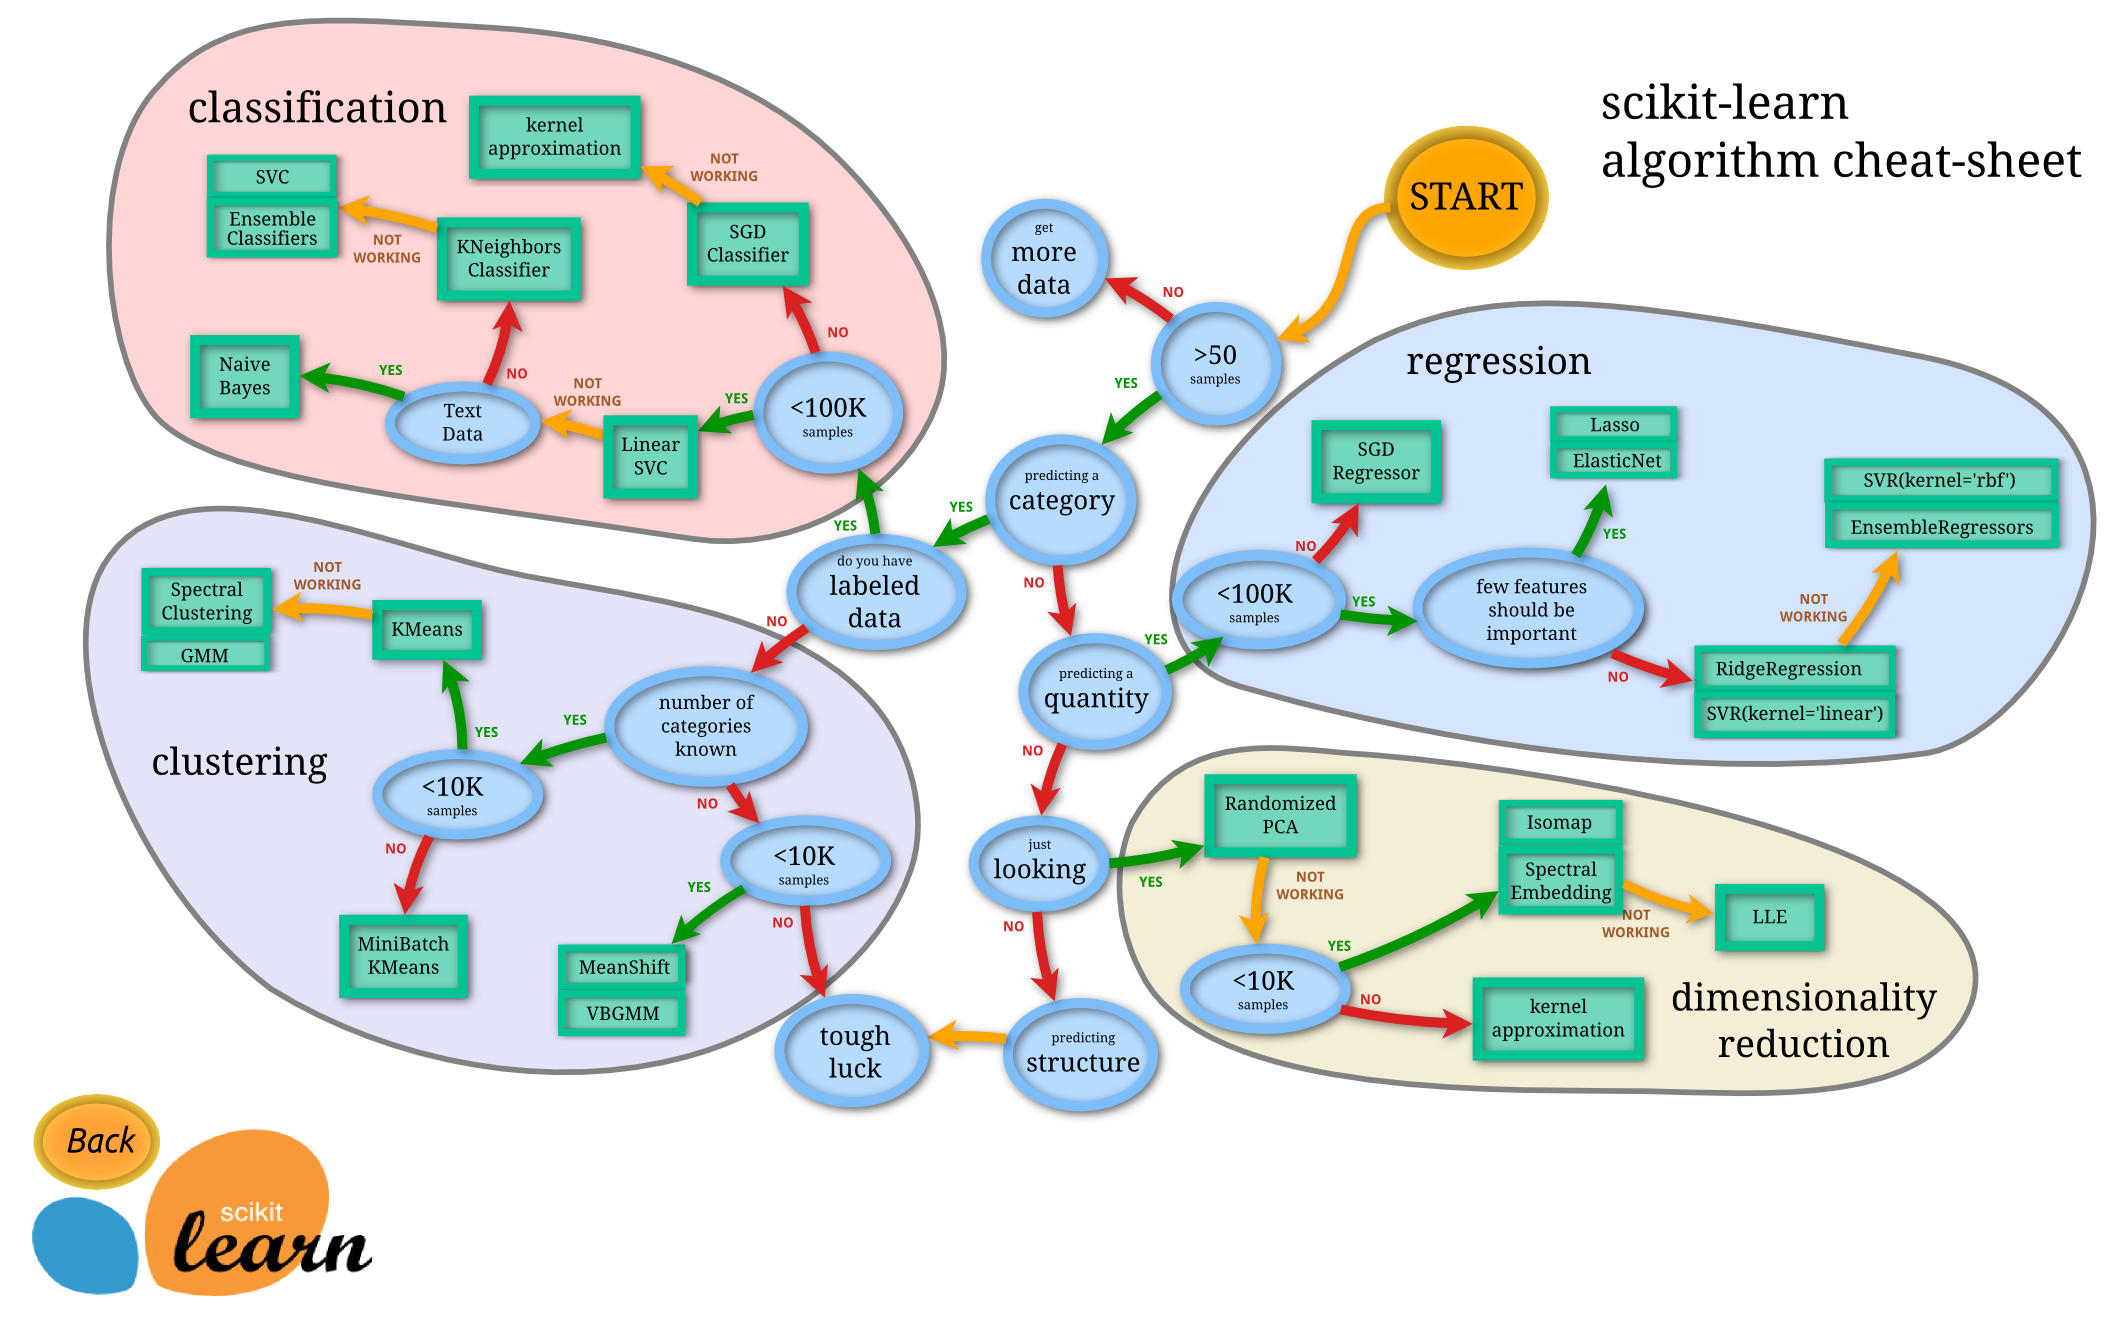

In [32]:
from IPython.display import Image
Image("http://scikit-learn.org/dev/_static/ml_map.png")

Original source on the [scikit-learn website](http://scikit-learn.org/stable/tutorial/machine_learning_map/)

## 快速应用：OCR识别

我们根据上面的原则展示一个更有趣的例子，OCR识别
- 就是识别手写的数字
这个问题涉及在一副图片中查找和识别数字。这里为了方便，我们引用了sklearn库中预处理过的数字。

### 加载和可视化数字

我们将使用sklearn接口大致预览一下这些数据：

In [34]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

我们绘制出部分数据：

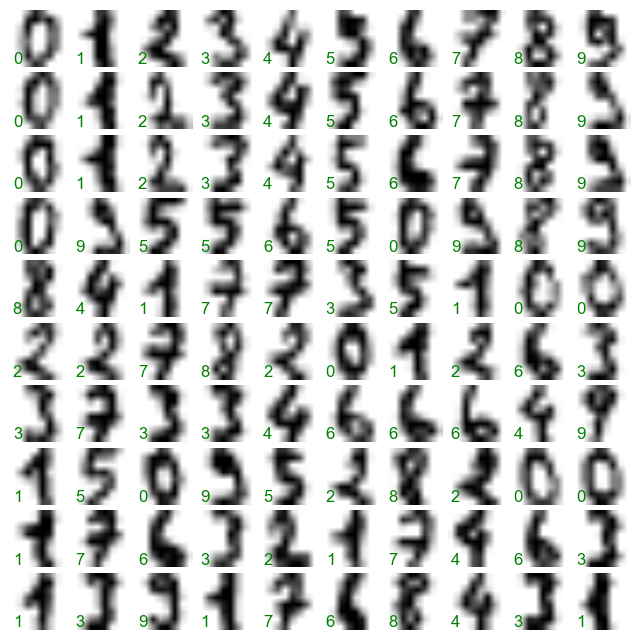

In [35]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

这里数字表示为8*8的像素值：

In [36]:
# The images themselves
print(digits.images.shape)
print(digits.images[0])

(1797, 8, 8)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [28]:
# The data for use in our algorithms
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [29]:
# The target label
print(digits.target)

[0 1 2 ..., 8 9 8]


我们的数据含有1797个样本，每个样本有64维。

### 无监督学习：降维
我们想可视化64维的参数空间，但把它绘制出来很难。于是乎我们使用一种无监督的方法把它降成2维的。这里，我们将使用一种称为*Isomap*的manifold算法，来转换成2位的数据。

In [47]:
from sklearn.manifold import Isomap

In [48]:
iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)

In [49]:
data_projected.shape

(1797, 2)

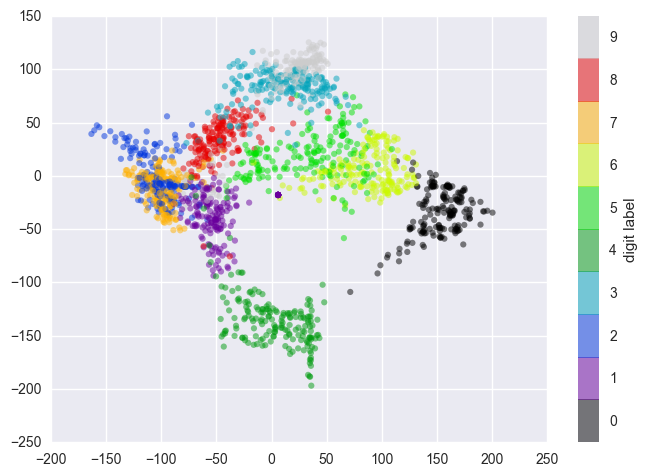

In [50]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

我们看到了数字在2维的参数空间中被很好的分割开来，这样我们就可以采用监督的分类算法。

### 数字分类

我们尝试对数字进行分类。首先我们把数字分为训练集和测试集。

In [51]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=2)
print(Xtrain.shape, Xtest.shape)

((1347, 64), (450, 64))


让我们采用一个简单的logistic回归算法：

In [52]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(ytest)
print(ypred)

[4 0 9 1 4 7 1 5 1 6 6 7 6 1 5 5 4 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 8 5 7 9 6 9 6 1 3 0 1 9 7 3 3 1 1 8 8 9 8 5 4 4 7 3 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 8 5 0 3 9 2 7 3 2 0 8 1 9 2 1 9 1 0 3 4 3 0 9 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 8 7 4 8 9 5 7 6 9 0 0 4 0 0 4 0 6 5 8 8
 3 7 9 2 0 3 2 7 3 0 2 1 5 2 7 0 6 9 3 1 1 3 5 2 3 5 2 1 2 9 4 6 5 5 5 9 7
 1 5 9 6 3 7 1 7 5 1 7 2 7 5 5 4 8 6 6 2 8 7 3 7 8 0 9 5 7 4 3 4 1 0 3 3 5
 4 1 3 1 2 5 1 4 0 3 1 5 5 7 4 0 1 0 8 5 5 5 4 0 1 8 6 2 1 1 1 7 9 6 7 9 7
 0 4 9 6 9 2 7 2 1 0 8 2 8 6 5 7 8 4 5 7 8 6 5 2 6 9 3 0 0 8 0 6 6 7 1 4 5
 6 9 7 2 8 5 1 2 4 1 8 8 7 6 0 8 0 6 5 5 7 8 0 4 1 4 5 9 2 2 3 9 1 3 9 3 2
 8 0 6 5 6 2 5 2 3 2 6 1 0 7 6 0 6 2 7 0 3 2 4 2 9 6 9 7 7 0 3 5 4 1 2 2 1
 2 7 7 0 4 9 8 5 6 1 6 5 2 0 8 2 4 3 3 2 9 3 8 9 9 3 9 0 3 4 7 9 1 5 7 5 0
 5 3 5 0 2 7]
[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 1 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 

通过和测试集的分类标签进行比较，我们看下分类的精确度：

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.94666666666666666

这个数字没有告诉我们哪些类分错了，一个好的方法就是使用*混淆矩阵*：

In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  3  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  2  0  3  1  0]
 [ 0  2  0  0 36  0  0  0  1  1]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  2  0  0  0  0  0  0 38  0]
 [ 0  0  0  1  0  1  0  1  2 34]]


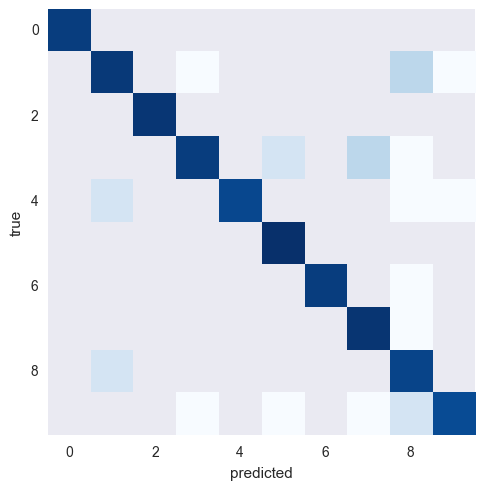

In [55]:
plt.imshow(np.log(confusion_matrix(ytest, ypred)),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

我们把分好类的数字绘制出来，红色的数字表示错误的分类：

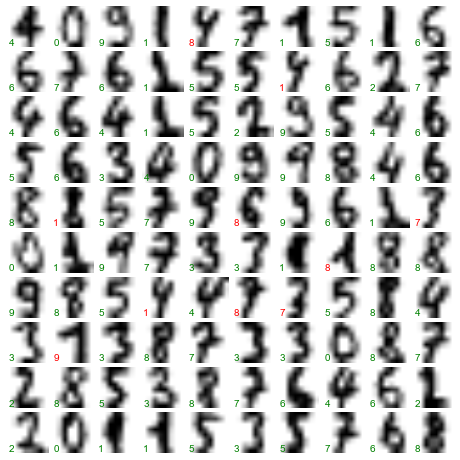

In [39]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])

这个例子只用了简单的logistic回归算法就搞定了，有很多方式可以改进我们的分类器。进一步我们将使用更复杂的模型，使用交叉验证，和其他技术。这些在教程的后面会涉及。